# Laboratório de Interpolação #

Neste laboratório, iremos implementar os métodos de Interpolação Polinomial, Lagrange e Newton

## Preliminares ##

Antes de mais nada, precisamos de uma função que, dados os coeficientes `c` de um polinômio de grau `len(c)-1` e um valor `x`, calcule `y = f(x)`:

In [1]:
import numpy as np

In [62]:
def resolvePoli(c,x):
    return np.array(([x**i*c[len(c)-1-i] for i in range(len(c))])).sum(axis=0)

In [63]:
x = 3
c = np.array([2,1,-10])
resolvePoli(c,x)

11

Precisamos também de uma função que dado um conjunto ordenados de pontos `x`, um valor a ser interpolado `xalvo` e um número `n`, escolha um intervalo com `n` que minimize a distância entre `xalvo` e os pontos do intervalo e retorne `n` valores de `x` e `y` deste intervalo:

In [10]:
def escolheIntervalo(x,y,xalvo,n):
    d = np.abs(xalvo - x)
    vx = np.copy(x)
    vy = np.copy(y)
    for i in range(len(x)-n):
        m = np.argmax(d)
        vx = np.delete(vx,m)
        vy = np.delete(vy,m)
        d = np.delete(d,m)
    return vx,vy

In [44]:
x = np.array([1950,1960,1970,1980])
y = np.array([100,120,280,500])
escolheIntervalo(x,y,1958,3)

(array([1950, 1960, 1970]), array([100, 120, 280]))

## Interpolação Polinomial ##

Na interpolação polinomial, o objetivo é descobrir os coeficientes de um polinômio de ordem `n-1` que passe pelos `n` pontos utilizados para gerar o polinômio. Ou seja, quanto mais pontos são utilizados, maior o grau do polinômio gerado. Para gerar este polinômio, basta substituir os valores $(x_i,y_i)$ no polinomio genérico e, a partir das equações geradas, montar um sistema linear para descobrir os coeficientes.

Por exemplo, com três observações pode-se gerar um polinômio de terceiro grau, utilizando a forma abaixo:

$$
\left[ \begin{array} { c c c } { x _ { 1} ^ { 2} } & { x _ { 1} } & { 1} \\ { x _ { 2} ^ { 2} } & { x _ { 2} } & { 1} \\ { x _ { 3} ^ { 2} } & { x _ { 3} } & { 1} \end{array} \right] \left[ \begin{array} { l } { a } \\ { b } \\ { c } \end{array} \right] = \left[ \begin{array} { l } { y _ { 1} } \\ { y _ { 2} } \\ { y _ { 3} } \end{array} \right]
$$

Independente da quantidade de pontos, a matriz gerada sempre terá a característica de possuir 1 na última coluna ($x^0$), com cada coluna anterior sendo a posterior multiplicada por $x$.

Faça uma função que, dado um vetor `x` e um `y` contendo os pontos a interpolar, retorne o vetor de coeficientes `c` de um polinômio que passe por todos os pontos de $(x,y)$:

In [46]:
def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def eliminacaoGaussianaSimples(A0,b):
    M = np.zeros(A0.shape)
    A = np.concatenate((A0,b.reshape(len(b),1)),axis=1)
    for i in range(len(A)-1):
        A[i+1:] -= (A[i+1:,i]/A[i][i]).reshape((len(M[i+1:]),1))*A[i]
    return resolveTS(A[:,:len(b)],A[:,len(b)])

In [47]:
def interpoli(x,y):
    t = len(x)
    A = np.zeros((t,t),dtype='float')
    for i in range(t):
        A[:,i] = x**(t-i-1)
    return eliminacaoGaussianaSimples(A,y)

In [48]:
x = np.array([1250,1000,750])
y = np.array([25,15,10])
coef = interpoli(x,y)
coef

array([ 4.0e-05, -5.0e-02,  2.5e+01])

In [49]:
resolvePoli(coef,850)

11.400000000000002

Verifique o funcionamento da sua função para os pontos abaixo. Escolha 3 intervalos para o ponto 2008, com 2, 3 e 5 pontos. Ache os coeficientes para estes três intervalos e plote as três funções usando o código abaixo:

In [69]:
print(x08_4)
print(y08_4)
resolvePoli(c08_4,x08_4)

[2006 2007 2009 2010 2011]
[173169 191347 230612 252274 271885]


array([173169.25, 191348.75, 230612.25, 252275.  , 271887.  ])

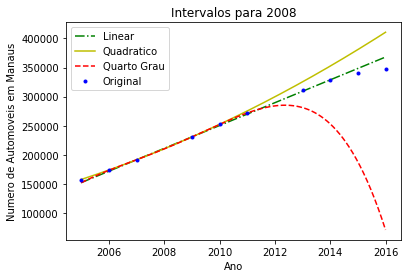

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

xauto = np.array([2005,2006,2007,2009,2010,2011,2013,2014,2015,2016])
yauto = np.array([156490,173169,191347,230612,252274,271885,311179,328715,340477,347799])

x08_1,y08_1 = escolheIntervalo(xauto,yauto,2008,2)
x08_2,y08_2 = escolheIntervalo(xauto,yauto,2008,3)
x08_4,y08_4 = escolheIntervalo(xauto,yauto,2008,5)

c08_1 = interpoli(x08_1,y08_1)
c08_2 = interpoli(x08_2,y08_2)
c08_4 = interpoli(x08_4,y08_4)

xplot = np.linspace(2005,2016,500)

yp08_1 = resolvePoli(c08_1,xplot)
yp08_2 = resolvePoli(c08_2,xplot)
yp08_4 = resolvePoli(c08_4,xplot)

plt.plot(xplot,yp08_1.round(2),'g-.',label='Linear')
plt.plot(xplot,yp08_2.round(2),'y-',label='Quadratico')
plt.plot(xplot,yp08_4.round(2),'r--',label='Quarto Grau')
plt.plot(xauto,yauto,'b.',label='Original')
plt.ylabel('Numero de Automoveis em Manaus')
plt.xlabel('Ano')
plt.legend(loc='upper left')
plt.title("Intervalos para 2008")
plt.show()

Repita o processo acima para o ano de 2012:

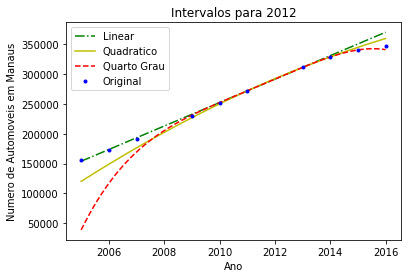

In [70]:
x08_1,y08_1 = escolheIntervalo(xauto,yauto,2012,2)
x08_2,y08_2 = escolheIntervalo(xauto,yauto,2012,3)
x08_4,y08_4 = escolheIntervalo(xauto,yauto,2012,5)

c08_1 = interpoli(x08_1,y08_1)
c08_2 = interpoli(x08_2,y08_2)
c08_4 = interpoli(x08_4,y08_4)

xplot = np.linspace(2005,2016,500)

yp08_1 = resolvePoli(c08_1,xplot)
yp08_2 = resolvePoli(c08_2,xplot)
yp08_4 = resolvePoli(c08_4,xplot )

plt.plot(xplot,yp08_1,'g-.',label='Linear')
plt.plot(xplot,yp08_2,'y-',label='Quadratico')
plt.plot(xplot,yp08_4,'r--',label='Quarto Grau')
plt.plot(xauto,yauto,'b.',label='Original')
plt.ylabel('Numero de Automoveis em Manaus')
plt.xlabel('Ano')
plt.legend(loc='upper left')
plt.title("Intervalos para 2012")
plt.show()

## Polinômio de Lagrange ##

Vamos agora implementar o polinômio de Lagrange. Nele, ao invés de calcular os coeficientes do poliômio, se calcula diretamente o valor de f(x) baseado nos pontos usados para interpolar.

A fórmula do polinômio de Lagrange é dada abaixo:

$$
L _ { n } ( x ) = \sum _ { i = 0} ^ { n } y _ { i } \prod _ { \substack{j = 0\\j\neq i}} ^ { n } \frac { x - x _ { j } } { x _ { i } - x _ { j } }
$$

Implemente uma função que receba os pontos `x`, `y` e o valor a ser interpolado `xalvo` e retorne o valor de `f(xalvo)`:

In [21]:
def lagrange(x,y,xalvo):
    n = len(x)
    return np.sum([y[i]*np.prod([(xalvo-x[j])/(x[i]-x[j]) for j in range(n) if j != i]) for i in range(n)])

Uma diferença na implementação do método de lagrange pode ser deixar a divisão para depois do produtório, diminuindo o número de divisões feitas pelo programa (ver algoritmo nos slides).

Implemente uma versão de Lagrange que faça a divisão somente após o produtório:

In [95]:
def lagranged(x,y,xalvo):
    t = len(x)
    yalvo = 0
    for i in range(t):
        n = d = 1
        for j in range(t):
            if i != j:
                n *= (xalvo-x[j])
                d *= (x[i]-x[j])
        yalvo += y[i]*(n/d)
    return yalvo

Verifique o funcionamento do polinômio de Lagrange nos dados de automóveis do exemplo acima, calculando os valores para 2008 e 2012 com 2,3 e 5 pontos. Compute a diferença de tempo entre as duas versões implementadas com o `%timeit`:

In [78]:
print("-> Usando 2 pontos:")
print("\tLagrange:  ",end="")
%timeit -n1 lagrange(xauto[:2],yauto[:2],2008)
print("\tLagranged: ",end="")
%timeit -n1 lagranged(xauto[:2],yauto[:2],2008)
print("\n-> Usando 3 pontos:")
print("\tLagrange:  ",end="")
%timeit -n1 lagrange(xauto[:3],yauto[:3],2008)
print("\tLagranged: ",end="")
%timeit -n1 lagranged(xauto[:3],yauto[:3],2008)
print("\n-> Usando 5 pontos:")
print("\tLagrange:  ",end="")
%timeit -n1 lagrange(xauto[:5],yauto[:5],2008)
print("\tLagranged: ",end="")
%timeit -n1 lagranged(xauto[:5],yauto[:5],2008)

-> Usando 2 pontos:
	Lagrange:  118 µs ± 28 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
	Lagranged: 34 µs ± 7.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

-> Usando 3 pontos:
	Lagrange:  158 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
	Lagranged: 50.5 µs ± 9.88 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

-> Usando 5 pontos:
	Lagrange:  239 µs ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
	Lagranged: 86.6 µs ± 7.59 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Polinômio de Newton ##

Para computar o polinômio de Newton primeiramente deve-se computar o operador de Diferenças Divididas:
$$
\Delta ^ { n } y _ { i } = \frac { \Delta ^ { n - 1} y _ { i + 1} - \Delta ^ { n - 1} y _ { i } } { x _ { i + n } - x _ { i } }
$$

Implemente uma função que, dado `x` e `y`, retorne a matriz `d` com as diferenças divididas:

In [108]:
def difdiv(x,y):
    t = len(x)
    d = np.zeros((t,t))
    d[:,0] = y
    for j in range(1,t):
        for i in range(t-j):
            d[i,j] = (d[i+1,j-1]-d[i,j-1])/(x[j+i]-x[i])
    return d

In [110]:
x = np.array([0.0,0.2,0.3,0.5,0.6])
y = np.array([1.008,1.064,1.125,1.343,1.512])
difdiv(x,y).round(2)

array([[ 1.01,  0.28,  1.1 ,  1.  , -0.  ],
       [ 1.06,  0.61,  1.6 ,  1.  ,  0.  ],
       [ 1.12,  1.09,  2.  ,  0.  ,  0.  ],
       [ 1.34,  1.69,  0.  ,  0.  ,  0.  ],
       [ 1.51,  0.  ,  0.  ,  0.  ,  0.  ]])

Faça agora uma função que, dado os pontos `x`,`y`, a matriz de diferenças divididas `d` e o ponto a ser interpolado `xalvo`, calcule o valor de `y`, de acordo com o polinômio interpolador de Newton:

$$
P _ { n } ( x ) = y _ { 0} + \sum _ { i = 1} ^ { n } \Delta _ { 0} ^ { i } y _ { 0} \prod _ { j = 0} ^ { i - 1} \left( x - x _ { j } \right)
$$

In [112]:
def poliNewton(x,y,d,xalvo):
    pn = y[0]
    t = len(x)
    for i in range(t):
        pn += (d[:,i] * np.prod(xalvo - x[:i])).sum()
    return y

Verifique o funcionamento do polinômio de Newton nos dados de automóveis do exemplo acima, calculando os valores para 2008 e 2012 com 2,3 e 5 pontos:

In [115]:
poliNewton(xauto[:2],yauto[:2],difdiv(xauto,yauto),2008)

array([156490, 173169])

In [114]:
print("-> Usando 2 pontos:")
%timeit -n1 poliNewton(xauto[:2],yauto[:2],difdiv(xauto,yauto),2008)
print("\n-> Usando 3 pontos:")
%timeit -n1 poliNewton(xauto[:3],yauto[:3],difdiv(xauto,yauto),2008)
print("\n-> Usando 5 pontos:")
%timeit -n1 poliNewton(xauto[:5],yauto[:5],difdiv(xauto,yauto),2008)

-> Usando 2 pontos:
244 µs ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

-> Usando 3 pontos:
284 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

-> Usando 5 pontos:
335 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
